# Assignment 7 - Numpy and Matplotlib
### Due Thursday, June 3, 2021

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` with the filename `Assignment_7.ipynb`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [1]:
import numpy as nap


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

(you can have bash command inside a Jupyter cell if they start with a `!` )

In [2]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

--2021-06-14 13:46:36--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2021-06-14 13:46:37--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144032 (141K)
Saving to: ‘argo_float_4901412.npz.3’

argo_float_4901412. 100%[===================>] 140.66K   770KB/s    in 0.2s    

2021-06-14 13:46:37 (770 KB/s) - ‘argo_float_4901412.npz.3’ saved [144032/144032]



#### 1.3 Load the data file

In [3]:
data = nap.load('argo_float_4901412.npz')
list(data)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [6]:
T = data['T']
S = data['S']
P = data['P']
T = nap.ma.masked_array(T, mask=nap.isnan(T))
S = nap.ma.masked_array(S, mask=nap.isnan(S))
P = nap.ma.masked_array(P, mask=nap.isnan(P))


#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [7]:
date = data['date']
lat = data['lat']
lon = data['lon']
levels = data['levels']

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [8]:
T.shape

(78, 75)

In [9]:
S.shape

(78, 75)

In [10]:
P.shape

(78, 75)

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [11]:
import matplotlib.pyplot as plt

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

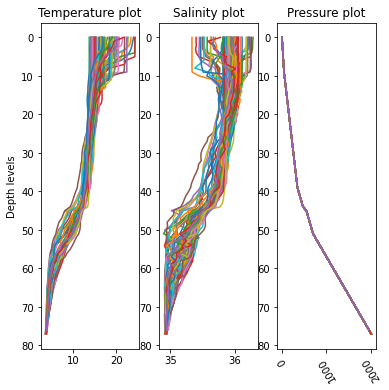

In [22]:
fig,ax = plt.subplots(1, 3, figsize=(6, 6))


ax[0].set_title('Temperature plot')
ax[0].set_ylabel('Depth levels')
ax[1].set_title('Salinity plot')
ax[2].set_title('Pressure plot')
ax[0].plot(T,levels)
ax[1].plot(S,levels)
ax[2].plot(P,levels)
plt.xticks(rotation=120)
for plot in ax:
    plot.invert_yaxis()
plt.show()

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [23]:
Tmean = T.mean(axis=1)
Tstd = T.std(axis=1)
Smean = S.mean(axis=1)
Sstd = S.std(axis=1)
Pmean = P.mean(axis=1)
Pstd = P.std(axis=1)

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

Text(0, 0.5, 'Depth Level')

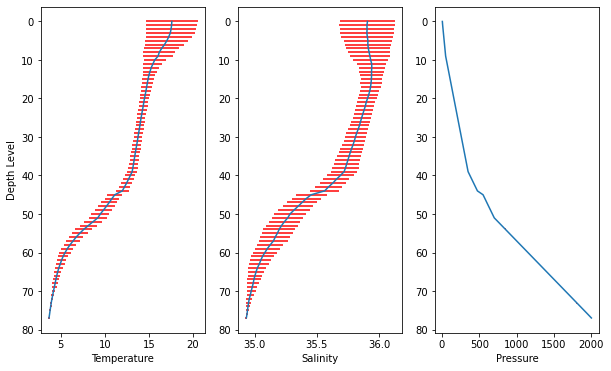

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
axs[0].errorbar(Tmean, levels, xerr=Tstd, ecolor='red')
axs[1].errorbar(Smean, levels, xerr=Sstd, ecolor='red')
axs[2].errorbar(Pmean, levels, xerr=Pstd, ecolor='red')

for i in range(3):
    axs[i].invert_yaxis()

axs[0].set_xlabel('Temperature')
axs[1].set_xlabel('Salinity')
axs[2].set_xlabel('Pressure')
axs[0].set_ylabel('Depth Level')

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [27]:
Tmean = T.mean(axis=0)
Tstd = T.std(axis=0)
Smean = S.mean(axis=0)
Sstd = S.std(axis=0)
Pmean = P.mean(axis=0)
Pstd = P.std(axis=0)

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

Text(0, 0.5, 'Date')

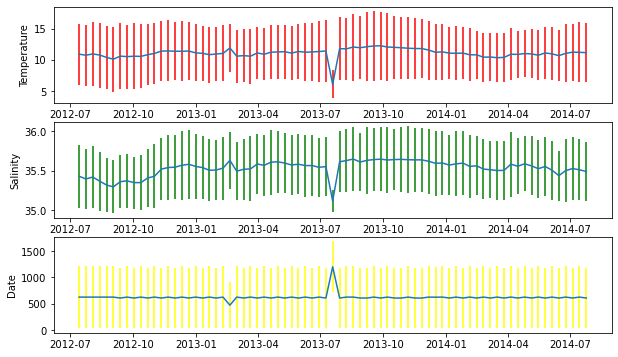

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].errorbar(date, Tmean, yerr=Tstd, ecolor='red')
axs[1].errorbar(date, Smean, yerr=Sstd, ecolor='green')
axs[2].errorbar(date, Pmean, yerr=Pstd, ecolor='yellow')

axs[0].set_ylabel('Temperature')
axs[1].set_ylabel('Salinity')
axs[2].set_ylabel('Pressure')
axs[2].set_ylabel('Date')

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

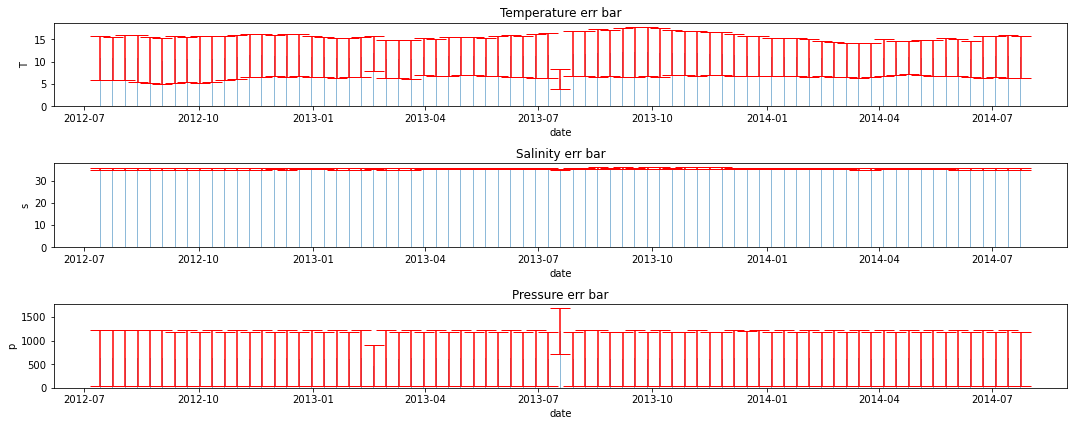

In [35]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(15, 6))

ax1.set_title('Temperature err bar')
ax1.set_ylabel('T')
ax1.set_xlabel('date')

ax2.set_title('Salinity err bar')
ax2.set_ylabel('s')
ax2.set_xlabel('date')

ax3.set_title('Pressure err bar')
ax3.set_ylabel('p')
ax3.set_xlabel('date')

ax1.bar(date, Tmean,
       yerr=Tstd,
       align='center',
       alpha=0.5,
       ecolor='red',
       capsize=10)

ax2.bar(date, Smean,
       yerr=Sstd,
       align='center',
       alpha=0.5,
       ecolor='red',
       capsize=10)


ax3.bar(date, Pmean,
       yerr=Pstd,
       align='center',
       alpha=0.5,
       ecolor='red',
       capsize=10)

fig.tight_layout(pad=1.0)

plt.show()

In [36]:
date

array(['2012-07-13T22:33:06.019200000', '2012-07-23T22:54:59.990400000',
       '2012-08-02T22:55:52.003200000', '2012-08-12T23:08:59.971200000',
       '2012-08-22T23:29:01.968000000', '2012-09-01T23:17:38.976000000',
       '2012-09-12T02:59:18.960000000', '2012-09-21T23:18:37.036800000',
       '2012-10-02T03:00:17.971200000', '2012-10-11T23:13:27.984000000',
       '2012-10-22T02:50:32.006400000', '2012-10-31T23:36:39.974400000',
       '2012-11-11T02:40:46.041600000', '2012-11-20T23:08:29.990400000',
       '2012-12-01T02:47:51.993600000', '2012-12-10T23:23:16.972800000',
       '2012-12-21T02:58:48.979200000', '2012-12-30T23:07:23.030400000',
       '2013-01-10T02:56:43.008000000', '2013-01-19T23:24:26.956800000',
       '2013-01-30T02:43:53.011200000', '2013-02-08T23:15:27.043200000',
       '2013-02-19T01:12:50.976000000', '2013-02-28T23:07:13.008000000',
       '2013-03-11T02:43:30.979200000', '2013-03-20T23:17:22.992000000',
       '2013-03-31T01:50:38.025600000', '2013-04-09

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

In [39]:
 def myMatrixMultiply(A, B):
    n, _ = A.shape
    C = nap.empty((n, n))
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i,j] = A[i,k]*B[k,j]
    return C  

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [43]:
n = 100
A = nap.ones((n,n))
B = nap.ones((n,n))

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

In [44]:
%%timeit
C = myMatrixMultiply(A, B)

543 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Now time how long the NumPy `dot()` version takes for n = 1000

In [ ]:
%%timeit
C = nap.dot(A, B)

And, finally, measure NumPy's `dot()` for n = 10000 (be patient, and defintely don't try this with `myMatrixMultiply` !)

Your results should demonstrate to you that the run time for matrix-matrix multiplication scales as a power law of `n`.

Assuming that the run time of `myMatrixMultiply` is proportional to the cube of `n`, approximately how long would you expect the run time to be for n=10000 in the original Python version?


NumPy allows you to do computations that would be way to slow with only Python statements.